# A/B Testing for E-commerce Advertisement Colors

In this notebook, we will perform an A/B test to evaluate the impact of different advertisement colors on the conversion rate for Flipkart's iPhone 13 sales. We will go step-by-step through the process, explaining each concept in detail.


## 1. Introduction

A/B testing, also known as split testing, is a method of comparing two versions of a webpage, app, email, or other user experience to determine which one performs better. In this example, we will compare two different advertisement colors for the iPhone 13 on Flipkart to see which one leads to a higher conversion rate.


## 2. Define the Hypothesis

**Hypothesis**: Changing the advertisement color of the iPhone 13 on Flipkart from color A to color B will increase the conversion rate.

- **Control Group (A)**: Advertisement with color A.
- **Variation Group (B)**: Advertisement with color B.

## 3. Generate Synthetic Data

We will generate synthetic data to simulate the visitors and conversions for each group. Assume we have 10,000 visitors in each group.
- Control group (A) has a 2.5% conversion rate.
- Variation group (B) has a 3.0% conversion rate.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Assume we have 10,000 visitors in each group
n_control = 10000
n_variation = 10000

# Assume a 2.5% conversion rate for the control group
conversion_rate_control = 0.025

# Assume a 3.0% conversion rate for the variation group
conversion_rate_variation = 0.03

# Simulate conversions: 1 = converted, 0 = did not convert
control_conversions = np.random.binomial(1, conversion_rate_control, n_control)
variation_conversions = np.random.binomial(1, conversion_rate_variation, n_variation)

# Create DataFrame
data = pd.DataFrame({
    'group': ['control'] * n_control + ['variation'] * n_variation,
    'converted': np.concatenate([control_conversions, variation_conversions])
})

data.head()


,group,converted
0,control,0
1,control,0
2,control,0
3,control,0
4,control,0


## 4. Calculate Conversion Rates

Conversion Rate is a metric used to measure the percentage of users who complete a desired action out of the total number of users who interacted with a campaign, website, app, or other platforms. The desired action could be anything, such as making a purchase, signing up for a newsletter, downloading an app, etc.

We will calculate the conversion rates for both the control and variation groups to see the initial comparison.


In [3]:
# Calculate conversion rates
conversion_rates = data.groupby('group')['converted'].mean().reset_index()
conversion_rates.columns = ['group', 'conversion_rate']

print("Conversion Rates:")
print(conversion_rates)

conversion_rates


Conversion Rates:
       group  conversion_rate
0    control           0.0225
1  variation           0.0325


,group,conversion_rate
0,control,0.0225
1,variation,0.0325


# 5. Perform Statistical Significance Test

We will use the Chi-Squared test to determine if the difference in conversion rates between the control and variation groups is statistically significant.


In [5]:
# Perform statistical significance test
control_success = np.sum(control_conversions)
variation_success = np.sum(variation_conversions)

control_failure = n_control - control_success
variation_failure = n_variation - variation_success

# Create contingency table
contingency_table = np.array([
    [control_success, control_failure],
    [variation_success, variation_failure]
])

# Perform Chi-Squared test
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-squared: {chi2}')
print(f'p-value: {p}')

Chi-squared: 18.32390745501285
p-value: 1.8635380677501434e-05


# 6. Visualize Results

 We will create a bar plot to visualize the conversion rates for both the control and variation groups.


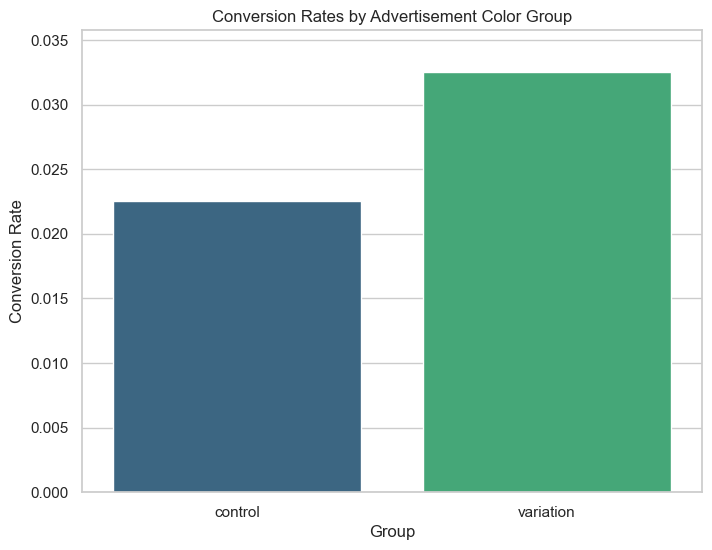

In [6]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visualize results
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='conversion_rate', data=conversion_rates, palette='viridis')
plt.title('Conversion Rates by Advertisement Color Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(conversion_rates['conversion_rate']) * 1.1)
plt.show()


# 7. Conclusion
Based on the p-value obtained from the Chi-Squared test, we can determine if the difference in conversion rates is statistically significant.

- the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that the difference is not statistically significant.